In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Question 1

Dans toute la suite, nous considérerons 
$$
\begin{matrix} f: & \mathbb{R}^2  & \longrightarrow & \mathbb{R}^2 \\
                  & (x_1,x_2)     & \longmapsto     & 
                            \begin{cases} \dot{x_1}=x_1(\alpha - \beta x_2) \\
                                          \dot{x_2}=x_2(\gamma - \delta x_1)
                            \end{cases}
\end{matrix}
$$
telle qu'une solution $x : I \rightarrow \mathbb{R}^2$ des équations de Lotka-Volterra soit solution de $\dot{x}=f(x)$.

* $\alpha$ représente (la procréation - les morts naturels) de l'espèce proie par individu
* $\beta$ caractérise la quantité de proie consommés par les prédateurs, par prédateurs par unité de temps
* $\gamma$ représente (la procréation - les morts naturels) de l'espèce prédateur
* $\delta$ caractérise les morts 

Soit $x_0 = (x_{10}, x_{20})$ un point d'équilibre du système. On a $\begin{cases} \dot{x}_1|_{x_{10}} = 0 \\ \dot{x}_2|_{x_{20}} = 0 \end{cases}$ alors $x_0$ vérifie 
$$
\begin{cases} x_{10}(\alpha - \beta x_{20})=0 \\ -x_{20}(\gamma - \delta x_{10}) = 0 \end{cases}
\iff 
\begin{cases} x_{10} = 0 & \mbox{ou } &\alpha - \beta x_{20}=0 \\ x_{20} = 0 & \mbox{ou } &\gamma - \delta x_{10} = 0 \end{cases}
$$
En considérant les quatre possibilités, les seules compatibles avec la stricte posivité des constantes $\alpha,\beta,\gamma,\delta$ sont $x_0=(0,0)$ et $\bar{x} = (\frac{\gamma}{\delta}, \frac{\alpha}{\beta})$ qui appartient donc à $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$

Soit $\varepsilon = (\varepsilon_1, \varepsilon_2)$ une petite variation depuis une position d'équilibre.
* Les deux sont instables?

In [4]:
def f(t, x):    
    x1, x2 = x
    u = x1 * (alpha - beta * x2)
    v = - x2 * (gamma - delta * x1)
    return np.array([u,v])

### Question 2

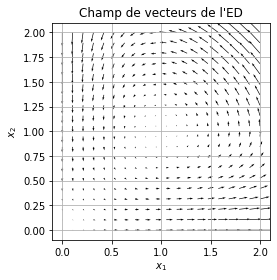

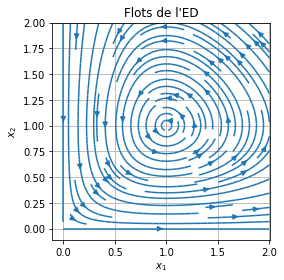

In [5]:
alpha, beta = 1, 1
gamma, delta = 1, 1

N = 20
X = np.linspace(0, 2, N)
Y = np.linspace(0, 2, N)
Grille = np.array(np.meshgrid(X, Y))
Dirs = f(0, Grille)
Pos = np.array(Grille.reshape(2, -1))

plt.quiver(*Pos, *Dirs)
plt.grid()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Champ de vecteurs de l'ED")
plt.axis('square')
plt.show()

plt.streamplot(X, Y, *Dirs, density = 1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Flots de l'ED")
plt.axis('square')
plt.grid()
plt.show()

### Question 3

* Soit $g$ la fonction définie par $$
\begin{matrix} g: & I \times \mathbb{R}^2  & \longrightarrow & \mathbb{R}^2 \\
                  & (t,x_1,x_2)     & \longmapsto     & 
                            f(x_1,x_2)
\end{matrix}
$$


Si $x$ est solution des équations de  Lotka-Volterra initialisées à $(t_0,x_0) \in I \times \mathbb{R}^2$, alors $x\in S_g(t_0,x_0)$.
Vérifions que g vérifie les hypothèses du théorème de  Cauchy-Lipschitz : $g$ est continue sur $I\times \mathbb{R}^2$ car $f$ est continue sur $\mathbb{R}^2$. De plus $(t,x)\mapsto \partial_x g(t,x) = J_f(x)$ existe et est continue sur $I\times \mathbb{R}^2$. Nous pourrons donc utiliser le théorème de Cauchy-Lipschitz dans la suite.


* Soit $(t_0,x_0) \in I \times \mathbb{R}_{>0} \times \mathbb{R}_{>0}$, soit $x \in S_g(t_0,x_0)$, supposons par l'absurde que x ne reste pas dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ sur son domaine de définition. Par continuité de $x$, il existe $t_1 \in I$ tel que par exemple $x_1(t_1) = 0$ (avec $x_1$ la première coordonnée de $x$)(on pourrait faire la chose qui suit avec $x_2(t_1) = 0$).

Alors $x \in  S_g(t_1,(0,x_2(t_1)))$
* Soit $A = \frac{x_2(t_1)}{\exp(-\gamma t_1)}$. On remarque que la fonction $$ 
\begin{matrix} y: & I  & \longrightarrow & \mathbb{R}^2 \\
                  & t     & \longmapsto     & 
                            (0,A\exp(-\gamma t))
\end{matrix}
$$ 

vérifie $y \in S_g(t_1,(0,x_2(t_1)))$.

### Question 5

In [28]:
def H(x1, x2):
    a = delta * x1
    b = gamma * np.log(x1)
    c = beta * x2
    d = alpha * np.log(x2)
    return a - b + c - d 

### Question 6

In [6]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = [t0]
    x = [x0]
    while t[-1] + dt <= tf:
        x0 = x[-1]
        x1 = x0 + dt * f(t[-1], x0)
        x.append(x1)
        t1 = t[-1] + dt
        t.append(t1)
    return np.array(t), np.array(x)


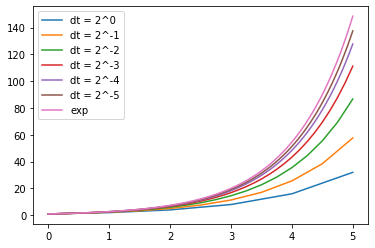

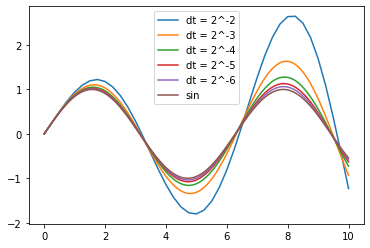

In [7]:
def f1(t, x):                           # Equation de l'exponentielle
    return x

def f2(t, x):                           # Vectorisation de l'oscillateur harmonique
    return np.array([-x[1], x[0]])

for i in range(6):                      # Convergence de l'exponentielle
    dt = 2**(-i)
    plt.plot(*solve_euler_explicit(f1, 1, dt, 0, 5), label = f'dt = 2^{-i}')
t = solve_euler_explicit(f1, 1, dt, 0, 5)[0]
plt.plot(t, np.exp(t), label='exp')
plt.legend()
plt.show()

for i in range(2,7):                    # Convergence du sinus
    dt = 2**(-i)
    t, x = solve_euler_explicit(f2, [1, 0], dt, 0, 10)
    plt.plot(t, x[:,1], label = f'dt = 2^{-i}')
plt.plot(t, np.sin(t), label='sin')
plt.legend()
plt.show()

### Question 7

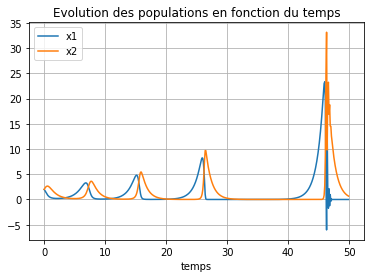

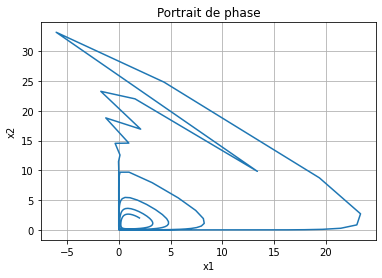

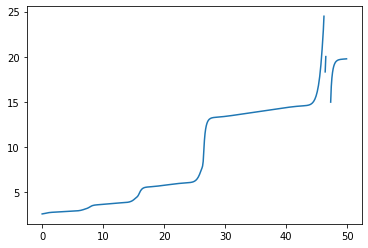

In [32]:
x10, x20 = 2, 2
dt = 0.1
t, x = solve_euler_explicit(f, [x10, x20], dt, 0, 50)
X1, X2 = x[:, 0], x[:, 1]

plt.plot(t, X1, label = 'x1')
plt.plot(t, X2, label = 'x2')
plt.title('Evolution des populations en fonction du temps')
plt.xlabel('temps')
plt.legend()
plt.grid()
plt.show()

plt.plot(X1, X2)
plt.title('Portrait de phase')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.show()

plt.plot(t, H(X1, X2))
plt.show()